# [Lab Session 2](otsu.ipynb)

In [47]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

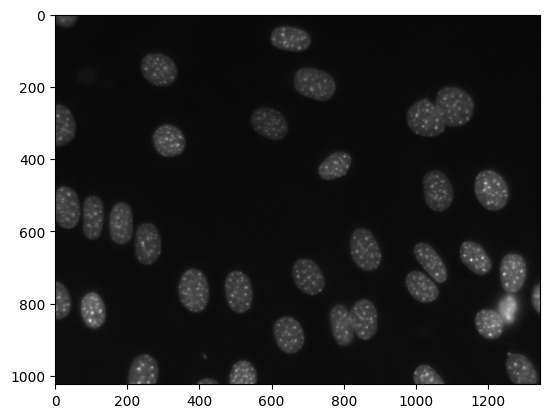

In [48]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")
plt.imshow(imgf, "grey")

**[Task 1.2.]()** Quantify the image into 256 bins:

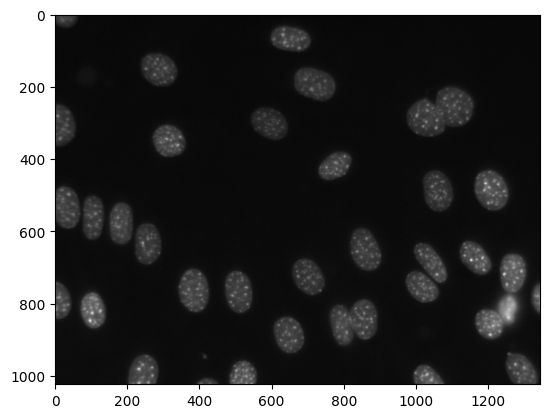

In [ ]:
img8 = (imgf * 255).round().astype(np.uint8)
plt.imshow(img8, "grey")

**[Task 1.3.]()** Compute the image histogram:

In [ ]:
h = np.zeros(256)
k = np.sum(h == 0) #Anzahl der Elemente im Array
#print(k)
for i in range(256): 
    h[i] = np.sum(img8 == i)

256


Show the computed histogram:

<BarContainer object of 256 artists>

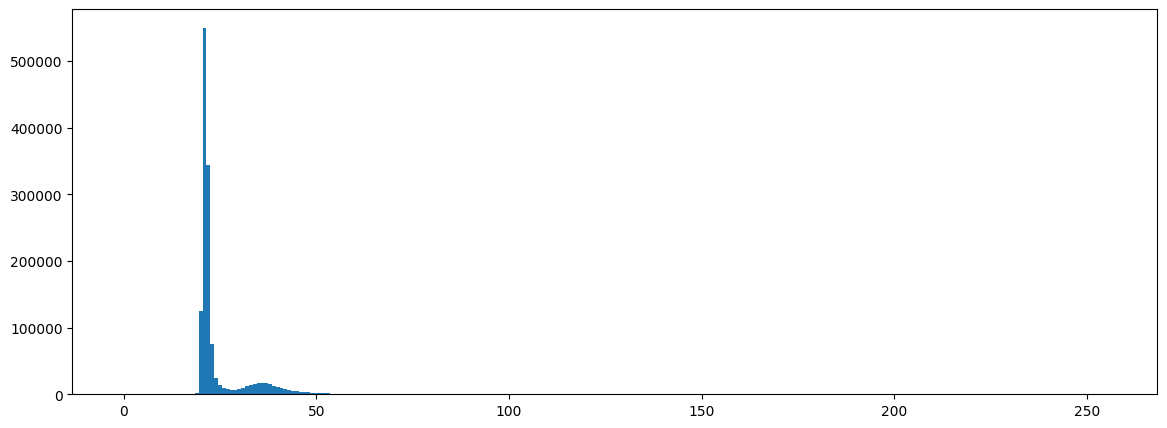

In [51]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [78]:
# sum_all -> gewichtete Summe der Intensitätswerte (np.dot)
sum_all = np.dot(np.arange(256), h)
sum_B = 0 
w_B = 0 
w_F = 0 
max_variance = 0 
optimal_threshold = 0

# gesamtzahl der Pixel
total_pixels = img8.size

#Iterieren über alle Werte im Array; w_B -> Gewicht des Hintergrundes, w_F -> Gewicht des Vordergrundes
for T in range(1, 256):
    w_B += h[T - 1]
    w_F = total_pixels - w_B
    if w_B == 0 or w_F == 0:
        continue

#Berechnung von Summe und Mittelwerten für Berechnung der Varianz 
    sum_B += (T - 1) * h[T - 1]
    mean_B = sum_B / w_B
    mean_F = (sum_all - sum_B) / w_F

    # Varianzen berechnen, Vorlesung slide 22
    var_B = np.sum(((np.arange(T) - mean_B) ** 2) * h[:T]) / w_B
    var_F = np.sum(((np.arange(T, 256) - mean_F) ** 2) * h[T:]) / w_F

#Formel aus Forlesung, muss minimiert werden slide 21
    within_class_variance = w_B * var_B + w_F * var_F

# Wenn within_class_variance kleiner als Varianz zuvor, dann wird treshold neu gesetzt, sowie max_variance an neuen Wert angepasst, sodass sich within_class_variance über steigende iterationen verringert 
    if within_class_variance < max_variance or max_variance == 0:
        max_variance = within_class_variance
        optimal_threshold = T

print(f'Optimal threshold by Otsu\'s method: {optimal_threshold}')



Optimal threshold by Otsu's method: 31


**[Task 1.5.]()** Perform Otsu thresholding:

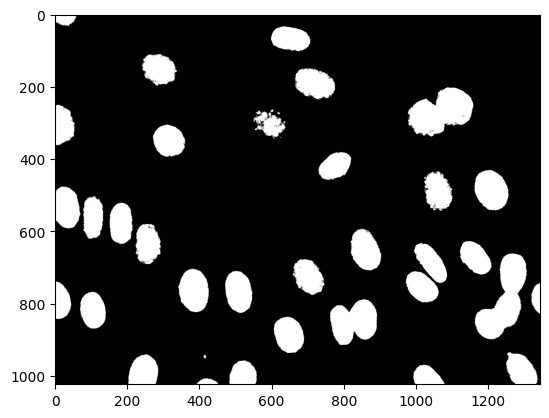

In [71]:
# Segment the image using the optimal threshold
segmented_img = img8 >= optimal_threshold

plt.imshow(segmented_img, "grey")

(-0.5, 1343.5, 1023.5, -0.5)

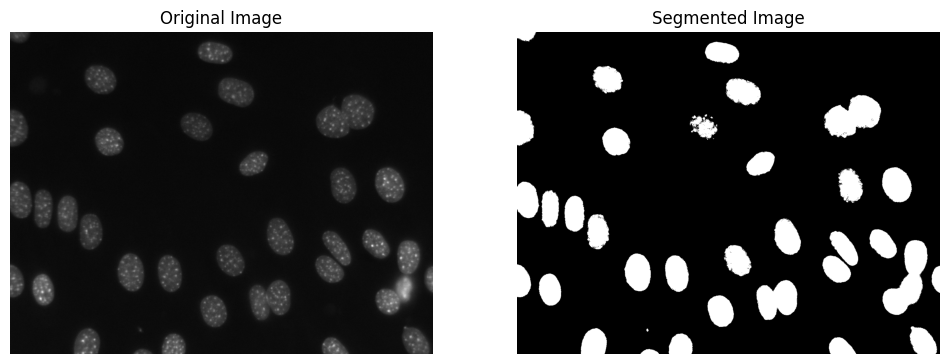

In [72]:
# Create subplots using plt.subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
axes[0].imshow(img8, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the segmented image
axes[1].imshow(segmented_img, cmap='gray')
axes[1].set_title('Segmented Image')
axes[1].axis('off')


**[Task 1.6.]()** Compute the Dice coefficient:

In [ ]:
img_ref = plt.imread("data/NIH3T3/gt/0.png")
dice = (2*np.sum(segmented_img*img_ref))/(segmented_img.sum()+img_ref.sum())
print(dice)


0.8943783223933183
45.2412130461128
